In [ ]:
import pandas as pd
import requests
import os
census_key = os.getenv('YOUR_API_KEY_HERE')
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker
from collections import Counter
from wordcloud import WordCloud
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
from scipy.stats import poisson 
import urllib.request, json 
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
sns.set(rc={'figure.figsize':(11.7,8.27)})
import warnings
warnings.simplefilter("ignore")
# Plot settings
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set_style("whitegrid")
sns.set_palette("dark") # set color palette

In [ ]:
url = 'https://api.census.gov/data/2020/acs/acs5?'
params = {'get' : 'NAME,B01001_001E,B02001_004E,B02001_005E,B01001H_001E,B01001B_001E,B01001I_001E',
          'for' : 'state:*'}
r = requests.get(url, params=params)
print(r.url)

https://api.census.gov/data/2020/acs/acs5?get=NAME%2CB01001_001E%2CB02001_004E%2CB02001_005E%2CB01001H_001E%2CB01001B_001E%2CB01001I_001E&for=state%3A%2A


In [ ]:
census_DataFrame = pd.DataFrame(r.json()[1:], columns=r.json()[0])

In [ ]:
census_DataFrame.head(10)

,NAME,B01001_001E,B02001_004E,B02001_005E,B01001H_001E,B01001B_001E,B01001I_001E,state
0,Pennsylvania,12794885,20798,449320,9685118,1419582,971813,42
1,California,39346023,311629,5834312,14365145,2250962,15380929,06
2,West Virginia,1807426,3146,14228,1654681,64285,28679,54
3,Utah,3151239,33222,73190,2455192,38059,446067,49
4,New York,19514849,76535,1674216,10766297,3002401,3720707,36
5,District of Columbia,701974,2438,28762,257792,318631,77981,11
6,Alaska,736990,107298,47289,439979,23894,53059,02
7,Florida,21216924,55655,590668,11331222,3381061,5468826,12
8,South Carolina,5091517,16951,83573,3230111,1346560,296897,45
9,North Dakota,760394,39165,11979,636284,23959,30325,38


In [ ]:
census_DataFrame = pd.DataFrame(r.json()[1:], columns=r.json()[0]) \
             .rename(columns={'NAME' : 'State Name',
                              'B01001_001E' : 'Total Population',
                              'B02001_004E' : 'Native',
                              'B02001_005E' : 'Asian',
                              'B01001H_001E' : 'White',
                              'B01001B_001E' : 'Black',
                              'B01001I_001E' : 'Hispanic'
                             }) \
             .set_index('State Name')


In [ ]:
census_DataFrame.head(10)

,Total Population,Native,Asian,White,Black,Hispanic,state
State Name,,,,,,,
Pennsylvania,12794885,20798,449320,9685118,1419582,971813,42
California,39346023,311629,5834312,14365145,2250962,15380929,06
West Virginia,1807426,3146,14228,1654681,64285,28679,54
Utah,3151239,33222,73190,2455192,38059,446067,49
New York,19514849,76535,1674216,10766297,3002401,3720707,36
District of Columbia,701974,2438,28762,257792,318631,77981,11
Alaska,736990,107298,47289,439979,23894,53059,02
Florida,21216924,55655,590668,11331222,3381061,5468826,12
South Carolina,5091517,16951,83573,3230111,1346560,296897,45


In [ ]:
census_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, Pennsylvania to Tennessee
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Total Population  52 non-null     object
 1   Native            52 non-null     object
 2   Asian             52 non-null     object
 3   White             52 non-null     object
 4   Black             52 non-null     object
 5   Hispanic          52 non-null     object
 6   state             52 non-null     object
dtypes: object(7)
memory usage: 3.2+ KB


In [ ]:
census_DataFrame['Total Population'] = census_DataFrame['Total Population'].astype(int)

In [ ]:
census_DataFrame['Native'] = census_DataFrame['Native'].astype(int)

In [ ]:
census_DataFrame['Black'] = census_DataFrame['Black'].astype(int)

In [ ]:
census_DataFrame['White'] = census_DataFrame['White'].astype(int)

In [ ]:
census_DataFrame['Hispanic'] = census_DataFrame['Hispanic'].astype(int)

In [ ]:
census_DataFrame['Asian'] = census_DataFrame['Asian'].astype(int)

In [ ]:
census_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, Pennsylvania to Tennessee
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Total Population  52 non-null     int64 
 1   Native            52 non-null     int64 
 2   Asian             52 non-null     int64 
 3   White             52 non-null     int64 
 4   Black             52 non-null     int64 
 5   Hispanic          52 non-null     int64 
 6   state             52 non-null     object
dtypes: int64(6), object(1)
memory usage: 3.2+ KB


In [ ]:
census_DataFrame.sort_values(by='Total Population')

,Total Population,Native,Asian,White,Black,Hispanic,state
State Name,,,,,,,
Wyoming,581348,13117,4892,485816,5079,58854,56
Vermont,624340,1873,10126,576601,7964,12518,50
District of Columbia,701974,2438,28762,257792,318631,77981,11
Alaska,736990,107298,47289,439979,23894,53059,02
North Dakota,760394,39165,11979,636284,23959,30325,38
South Dakota,879336,74975,12413,715328,18836,36088,46
Delaware,967679,3560,38528,595236,212795,91350,10
Rhode Island,1057798,4344,36536,755708,69196,168007,44
Montana,1061705,65523,8664,908782,5919,41501,30


In [ ]:
census_DataFrame['Total Population'] = pd.to_numeric(census_DataFrame['Total Population'], errors='coerce')


In [ ]:
census_DataFrame = census_DataFrame.assign(
    Others = census_DataFrame['Total Population'] - 
    census_DataFrame[['Asian', 'Black', 'White', 'Hispanic', 'Native']].sum(axis=1)
)


In [ ]:
census_DataFrame.head(10)

,Total Population,Native,Asian,White,Black,Hispanic,state,Others
State Name,,,,,,,,
Pennsylvania,12794885,20798,449320,9685118,1419582,971813,42,248254
California,39346023,311629,5834312,14365145,2250962,15380929,06,1203046
West Virginia,1807426,3146,14228,1654681,64285,28679,54,42407
Utah,3151239,33222,73190,2455192,38059,446067,49,105509
New York,19514849,76535,1674216,10766297,3002401,3720707,36,274693
District of Columbia,701974,2438,28762,257792,318631,77981,11,16370
Alaska,736990,107298,47289,439979,23894,53059,02,65471
Florida,21216924,55655,590668,11331222,3381061,5468826,12,389492
South Carolina,5091517,16951,83573,3230111,1346560,296897,45,117425


In [ ]:
population = census_DataFrame['Total Population']

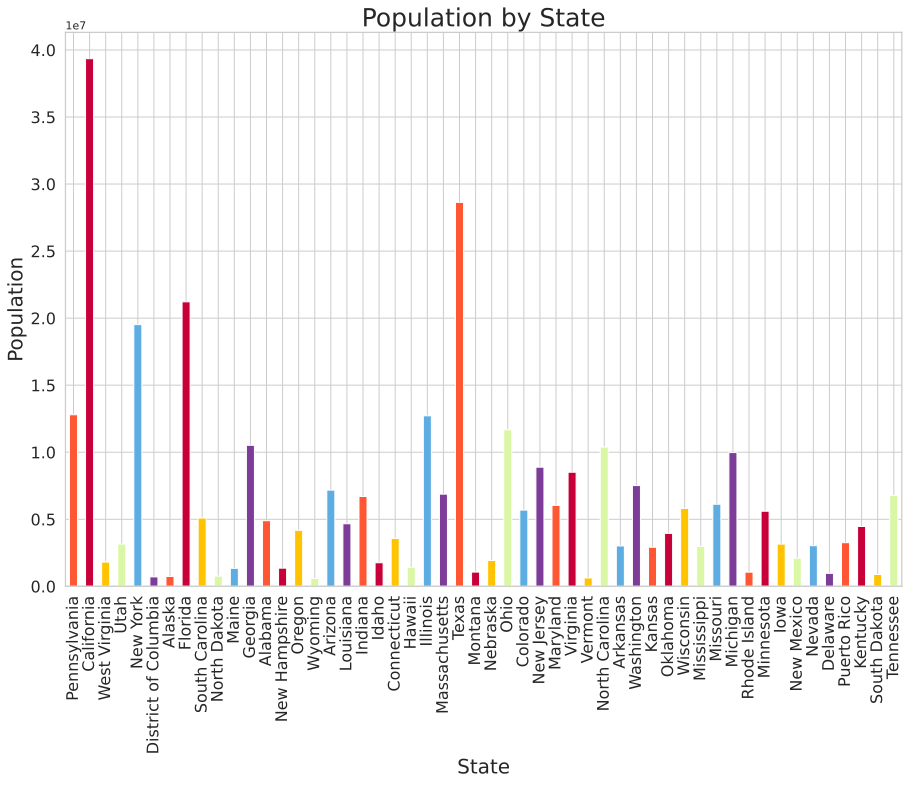

In [ ]:
# add colors to the bars
colors = ['#FF5733', '#C70039', '#FFC300', '#DAF7A6', '#5DADE2', '#7D3C98']

ax = population.plot.bar(figsize=(15,10), color=colors)

# set title and axis labels
ax.set_title('Population by State', fontsize=25)
ax.set_xlabel('State', fontsize=20)
ax.set_ylabel('Population', fontsize=20)

# set font size for tick labels
ax.tick_params(axis='both', which='major', labelsize=16)

# remove legend
ax.legend().remove()

# show the plot
plt.show()


In [ ]:
columns = ['Native','Asian','White','Black','Hispanic','Others']
for col in columns:
    census_DataFrame[col] = pd.to_numeric(census_DataFrame[col], errors='coerce')
    census_DataFrame[col + ' percent'] = (census_DataFrame[col]/census_DataFrame['Total Population'])*100


In [ ]:
census_DataFrame

,Total Population,Native,Asian,White,Black,Hispanic,state,Others,Native percent,Asian percent,White percent,Black percent,Hispanic percent,Others percent
State Name,,,,,,,,,,,,,,
Pennsylvania,12794885,20798,449320,9685118,1419582,971813,42,248254,0.162549,3.511716,75.695233,11.094918,7.595324,1.940260
California,39346023,311629,5834312,14365145,2250962,15380929,06,1203046,0.792022,14.828213,36.509776,5.720939,39.091445,3.057605
West Virginia,1807426,3146,14228,1654681,64285,28679,54,42407,0.174060,0.787197,91.549032,3.556715,1.586732,2.346265
Utah,3151239,33222,73190,2455192,38059,446067,49,105509,1.054252,2.322579,77.911958,1.207747,14.155289,3.348175
New York,19514849,76535,1674216,10766297,3002401,3720707,36,274693,0.392189,8.579190,55.169768,15.385213,19.066030,1.407610
District of Columbia,701974,2438,28762,257792,318631,77981,11,16370,0.347306,4.097303,36.723867,45.390712,11.108816,2.331995
Alaska,736990,107298,47289,439979,23894,53059,02,65471,14.558949,6.416505,59.699453,3.242106,7.199419,8.883567
Florida,21216924,55655,590668,11331222,3381061,5468826,12,389492,0.262314,2.783947,53.406526,15.935679,25.775772,1.835761
South Carolina,5091517,16951,83573,3230111,1346560,296897,45,117425,0.332926,1.641416,63.441033,26.447128,5.831209,2.306287


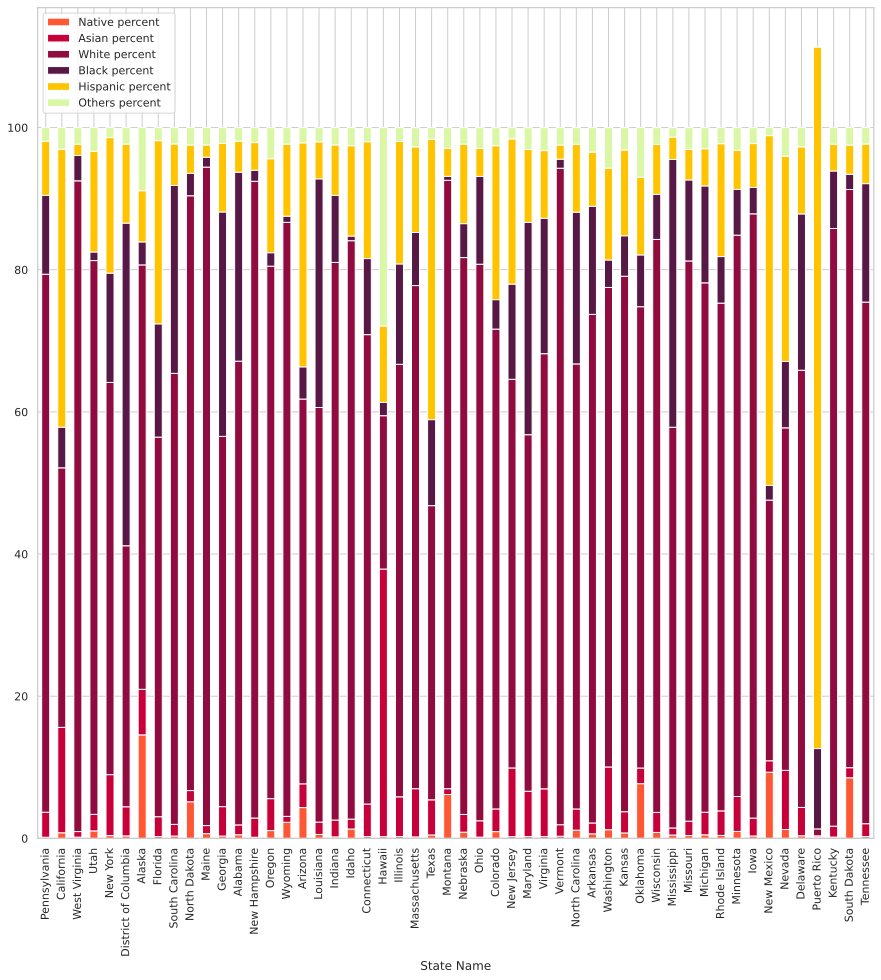

In [ ]:
temp_DataFrame = census_DataFrame[['Native percent', 'Asian percent', 'White percent', 'Black percent', 'Hispanic percent', 'Others percent']]
temp_DataFrame[temp_DataFrame < 0] = 0
colors = ['#FF5733', '#C70039', '#900C3F', '#581845', '#FFC300', '#DAF7A6']
a = temp_DataFrame.plot.bar(width=0.5, figsize=(15, 15), stacked=True, color=colors)


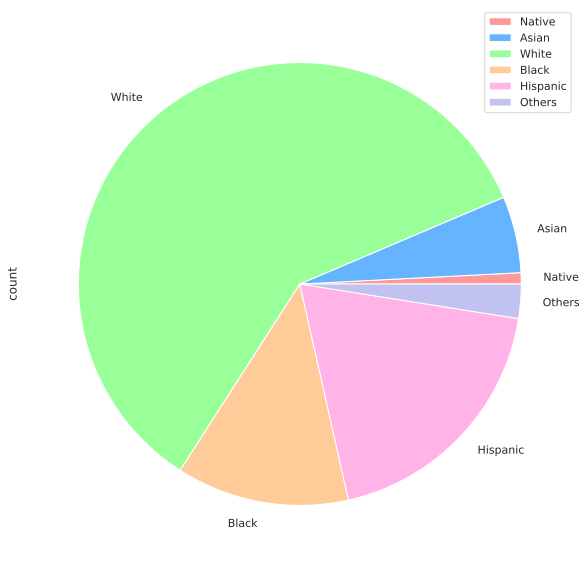

In [ ]:
df = pd.DataFrame({'count': [census_DataFrame[col].sum() for col in columns]}, index=columns)
if (df['count'] < 0).any():
    df['count'] = df['count'].clip(lower=0)    
plot = df.plot.pie(y='count', figsize=(10, 10), colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffb3e6','#c2c2f0'])


In [ ]:
peopleAndPercentage = pd.DataFrame({'percentage': [census_DataFrame.sum()[1]*100/census_DataFrame.sum()[0],census_DataFrame.sum()[2]*100/census_DataFrame.sum()[0],census_DataFrame.sum()[3]*100/census_DataFrame.sum()[0],census_DataFrame.sum()[4]*100/census_DataFrame.sum()[0],census_DataFrame.sum()[5]*100/census_DataFrame.sum()[0],census_DataFrame.sum()[7]*100/census_DataFrame.sum()[0]]},index=['Native', 'Asian', 'White','Black','Hispanic','Others'])

In [ ]:
peopleAndPercentage

,percentage
Native,0.816891
Asian,5.587060
White,59.511292
Black,12.611323
Hispanic,18.971774
Others,2.501659


In [ ]:
DataFrame1=pd.read_csv('US Police shootings in from 2015-22.csv')

In [ ]:
DataFrame1.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'],
      dtype='object')

In [ ]:
states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}

In [ ]:
DataFrame1.isnull().sum()

id                            0
name                        407
date                          0
manner_of_death               0
armed                       209
age                         472
gender                       19
race                       1438
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        863
body_camera                   0
longitude                   835
latitude                    835
is_geocoding_exact            0
dtype: int64

In [ ]:
#since the names are null and we just can't give some random values for unknown names, so I'll just assign Unknown name
DataFrame1['name'] = DataFrame1['name'].fillna('Unknown')

In [ ]:
DataFrame1['name'].isnull().sum()

0

In [ ]:
DataFrame1['armed'].nunique()

103

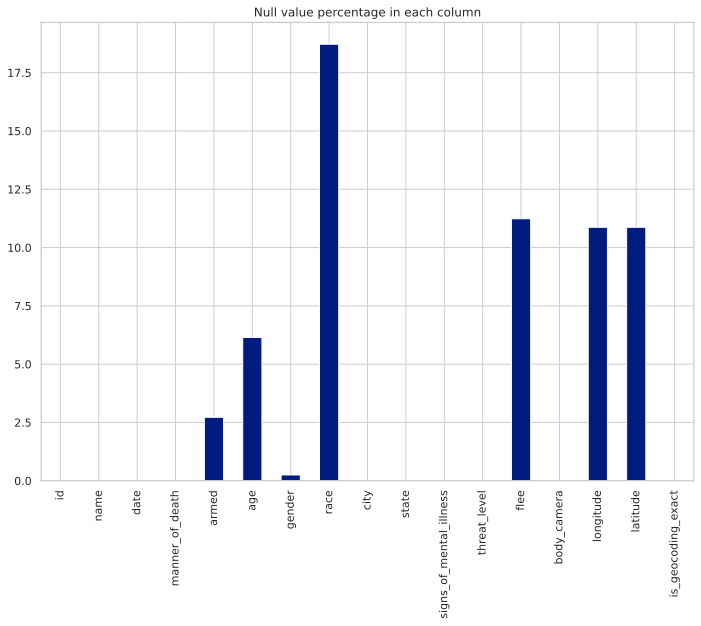

In [ ]:
nullPercentage = DataFrame1.isnull().sum()/DataFrame1.shape[0]*100
nullPercentage.plot(kind='bar')
plt.title("Null value percentage in each column")
plt.show()

In [ ]:
DataFrame1['race'].nunique()

6

In [ ]:
DataFrame1['race'].fillna('Other', inplace=True)

In [ ]:
DataFrame1['city'].mode()

0    Los Angeles
Name: city, dtype: object

In [ ]:
DataFrame1['city'].nunique()

3142

In [ ]:
DataFrame1.duplicated().sum()

0

In [ ]:
DataFrame1['state'].nunique()

51

In [ ]:
#taking 2 fields so that I can use -count() on it
State_Date = DataFrame1[['date','state']]
State_List = [i for i in State_Date['state']]

In [ ]:
State_Counts = []
for state in DataFrame1['state'].unique():
    State_Counts.append([State_List.count(state),state])
print(State_Counts)

[[208, 'WA'], [125, 'OR'], [71, 'KS'], [1110, 'CA'], [278, 'CO'], [211, 'OK'], [349, 'AZ'], [47, 'IA'], [159, 'PA'], [690, 'TX'], [219, 'OH'], [154, 'LA'], [48, 'MT'], [88, 'UT'], [109, 'AR'], [155, 'IL'], [124, 'NV'], [165, 'NM'], [86, 'MN'], [198, 'MO'], [134, 'VA'], [87, 'NJ'], [140, 'IN'], [141, 'KY'], [54, 'MA'], [22, 'NH'], [493, 'FL'], [62, 'ID'], [107, 'MD'], [38, 'NE'], [129, 'MI'], [289, 'GA'], [208, 'TN'], [218, 'NC'], [52, 'AK'], [140, 'NY'], [33, 'ME'], [145, 'AL'], [98, 'MS'], [115, 'WI'], [124, 'SC'], [17, 'DE'], [24, 'DC'], [71, 'WV'], [37, 'HI'], [25, 'WY'], [18, 'ND'], [22, 'CT'], [27, 'SD'], [12, 'VT'], [6, 'RI']]


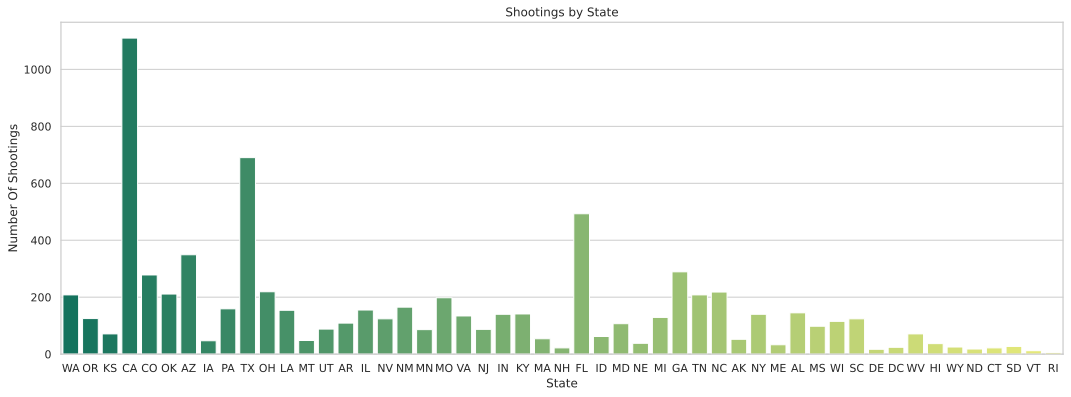

In [ ]:
# a plot for states vs number of incidents is plotted here
import seaborn as sns
x = [i[1] for i in State_Counts]
y = [i[0] for i in State_Counts]

plt.figure(figsize=(18,6))
sns.barplot(x=x,y=y,palette='summer')
plt.xlabel(xlabel = 'State')
plt.ylabel(ylabel = 'Number Of Shootings')
plt.title(label = 'Shootings by State')
plt.show()

In [ ]:
DataFrame1['age'] = DataFrame1['age'].fillna(DataFrame1['age'].mean())

In [ ]:
conditions = [
    (DataFrame1['age'] <= 18),
    (DataFrame1['age'] > 18) & (DataFrame1['age'] <= 40),
    (DataFrame1['age'] > 40) & (DataFrame1['age'] <= 60),
    (DataFrame1['age'] > 60)
    ]

# create a list of the values we want to assign for each condition
values = ['Age less than 18', 'Age between 18 and 40', 'Age between 40 and 60', 'Age greater than 60']

# create a new column and use np.select to assign values to it using our lists as arguments
DataFrame1['Age_of_the_Person'] = np.select(conditions, values)

# display updated DataFrame
DataFrame1.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,Age_of_the_Person
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,Age between 40 and 60
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True,Age between 40 and 60
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,Age between 18 and 40
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,Age between 18 and 40
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True,Age between 18 and 40


In [ ]:
DataFrame1['Age_of_the_Person'].value_counts()

Age between 18 and 40    4943
Age between 40 and 60    2090
Age greater than 60       399
Age less than 18          250
Name: Age_of_the_Person, dtype: int64

In [ ]:
fig = px.scatter_geo(DataFrame1,lat="latitude",lon='longitude',color='Age_of_the_Person',scope='usa')
fig.update_layout(title='Killings on Map',title_x=1)
fig.show()

<Axes: xlabel='deaths', ylabel='city'>

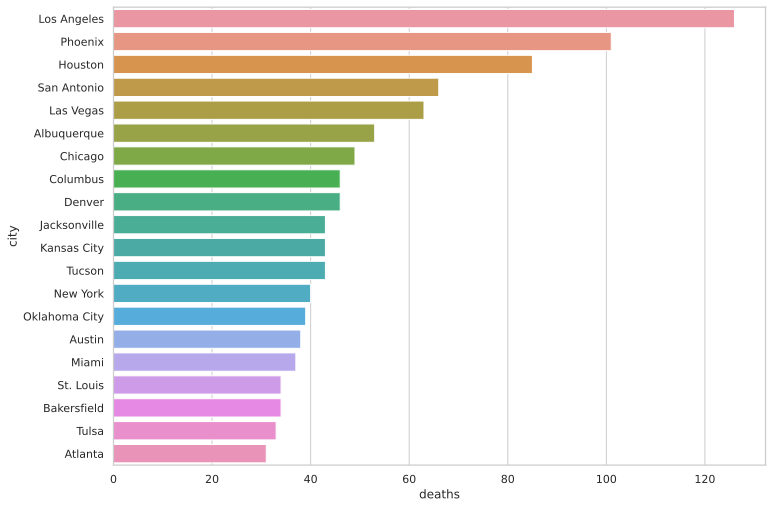

In [ ]:
forPlat=DataFrame1['city'].value_counts().reset_index().rename(columns={'index':'city','city':'deaths'}).head(20)

sns.barplot(y="city", x="deaths", data=forPlat,
            label="deaths")

In [ ]:
DataFrame2=DataFrame1.replace({"state": states})

In [ ]:
State_Date = DataFrame2[['date','state']]
State_List = [i for i in State_Date['state']]

In [ ]:
State_Counts = []
for state in DataFrame2['state'].unique():
    State_Counts.append([State_List.count(state),state])
print(State_Counts)

[[208, 'Washington'], [125, 'Oregon'], [71, 'Kansas'], [1110, 'California'], [278, 'Colorado'], [211, 'Oklahoma'], [349, 'Arizona'], [47, 'Iowa'], [159, 'Pennsylvania'], [690, 'Texas'], [219, 'Ohio'], [154, 'Louisiana'], [48, 'Montana'], [88, 'Utah'], [109, 'Arkansas'], [155, 'Illinois'], [124, 'Nevada'], [165, 'New Mexico'], [86, 'Minnesota'], [198, 'Missouri'], [134, 'Virginia'], [87, 'New Jersey'], [140, 'Indiana'], [141, 'Kentucky'], [54, 'Massachusetts'], [22, 'New Hampshire'], [493, 'Florida'], [62, 'Idaho'], [107, 'Maryland'], [38, 'Nebraska'], [129, 'Michigan'], [289, 'Georgia'], [208, 'Tennessee'], [218, 'North Carolina'], [52, 'Alaska'], [140, 'New York'], [33, 'Maine'], [145, 'Alabama'], [98, 'Mississippi'], [115, 'Wisconsin'], [124, 'South Carolina'], [17, 'Delaware'], [24, 'District of Columbia'], [71, 'West Virginia'], [37, 'Hawaii'], [25, 'Wyoming'], [18, 'North Dakota'], [22, 'Connecticut'], [27, 'South Dakota'], [12, 'Vermont'], [6, 'Rhode Island']]


In [ ]:
State_Counts.sort(reverse=True)

In [ ]:
print(State_Counts)

[[1110, 'California'], [690, 'Texas'], [493, 'Florida'], [349, 'Arizona'], [289, 'Georgia'], [278, 'Colorado'], [219, 'Ohio'], [218, 'North Carolina'], [211, 'Oklahoma'], [208, 'Washington'], [208, 'Tennessee'], [198, 'Missouri'], [165, 'New Mexico'], [159, 'Pennsylvania'], [155, 'Illinois'], [154, 'Louisiana'], [145, 'Alabama'], [141, 'Kentucky'], [140, 'New York'], [140, 'Indiana'], [134, 'Virginia'], [129, 'Michigan'], [125, 'Oregon'], [124, 'South Carolina'], [124, 'Nevada'], [115, 'Wisconsin'], [109, 'Arkansas'], [107, 'Maryland'], [98, 'Mississippi'], [88, 'Utah'], [87, 'New Jersey'], [86, 'Minnesota'], [71, 'West Virginia'], [71, 'Kansas'], [62, 'Idaho'], [54, 'Massachusetts'], [52, 'Alaska'], [48, 'Montana'], [47, 'Iowa'], [38, 'Nebraska'], [37, 'Hawaii'], [33, 'Maine'], [27, 'South Dakota'], [25, 'Wyoming'], [24, 'District of Columbia'], [22, 'New Hampshire'], [22, 'Connecticut'], [18, 'North Dakota'], [17, 'Delaware'], [12, 'Vermont'], [6, 'Rhode Island']]


In [ ]:
for states in census_DataFrame.index:
  print((State_List.count(states)/census_DataFrame.at[states,'Total Population'])*100)

0.0012426840882118128
0.0028211237511857295
0.003928238279188193
0.002792552389710841
0.0007174024251993956
0.0034189300458421536
0.0070557266720036906
0.002323616750477119
0.0024354234700581377
0.002367193849504336
0.0024611712937930006
0.0027480419250404528
0.00296330448096598
0.0016233239180546085
0.00299304703202273
0.004300350220521959
0.004864746118796822
0.0033014507517874995
0.002090521679232444
0.003534038202952974
0.0006161517458519684
0.0026054980233424455
0.0012189210519776247
0.0007856827648700284
0.002409601360439975
0.004521029852925247
0.0019752306081735043
0.0018757588151028562
0.004890125218868284
0.0009791323266952665
0.0017722203303816202
0.0015747368955448815
0.0019220296633244707
0.0020989335203245607
0.0036190104961264964
0.0027687317012458626
0.002437668641178266
0.005342662144731958
0.001980377046568997
0.0032865668288151427
0.0032330964573100635
0.0012933748028731368
0.0005672160469201114
0.0015356687641044926
0.0014920582817012386
0.00786830460925284
0.004092

In [ ]:
for states in census_DataFrame.index:
  print(((State_List.count(states)/census_DataFrame.at[states,'Total Population'])*100))
  census_DataFrame.at[states,'safty ratio'] = ((State_List.count(states)/census_DataFrame.at[states,'Total Population'])*100)

0.0012426840882118128
0.0028211237511857295
0.003928238279188193
0.002792552389710841
0.0007174024251993956
0.0034189300458421536
0.0070557266720036906
0.002323616750477119
0.0024354234700581377
0.002367193849504336
0.0024611712937930006
0.0027480419250404528
0.00296330448096598
0.0016233239180546085
0.00299304703202273
0.004300350220521959
0.004864746118796822
0.0033014507517874995
0.002090521679232444
0.003534038202952974
0.0006161517458519684
0.0026054980233424455
0.0012189210519776247
0.0007856827648700284
0.002409601360439975
0.004521029852925247
0.0019752306081735043
0.0018757588151028562
0.004890125218868284
0.0009791323266952665
0.0017722203303816202
0.0015747368955448815
0.0019220296633244707
0.0020989335203245607
0.0036190104961264964
0.0027687317012458626
0.002437668641178266
0.005342662144731958
0.001980377046568997
0.0032865668288151427
0.0032330964573100635
0.0012933748028731368
0.0005672160469201114
0.0015356687641044926
0.0014920582817012386
0.00786830460925284
0.004092

In [ ]:
tempo = census_DataFrame[['safty ratio']]

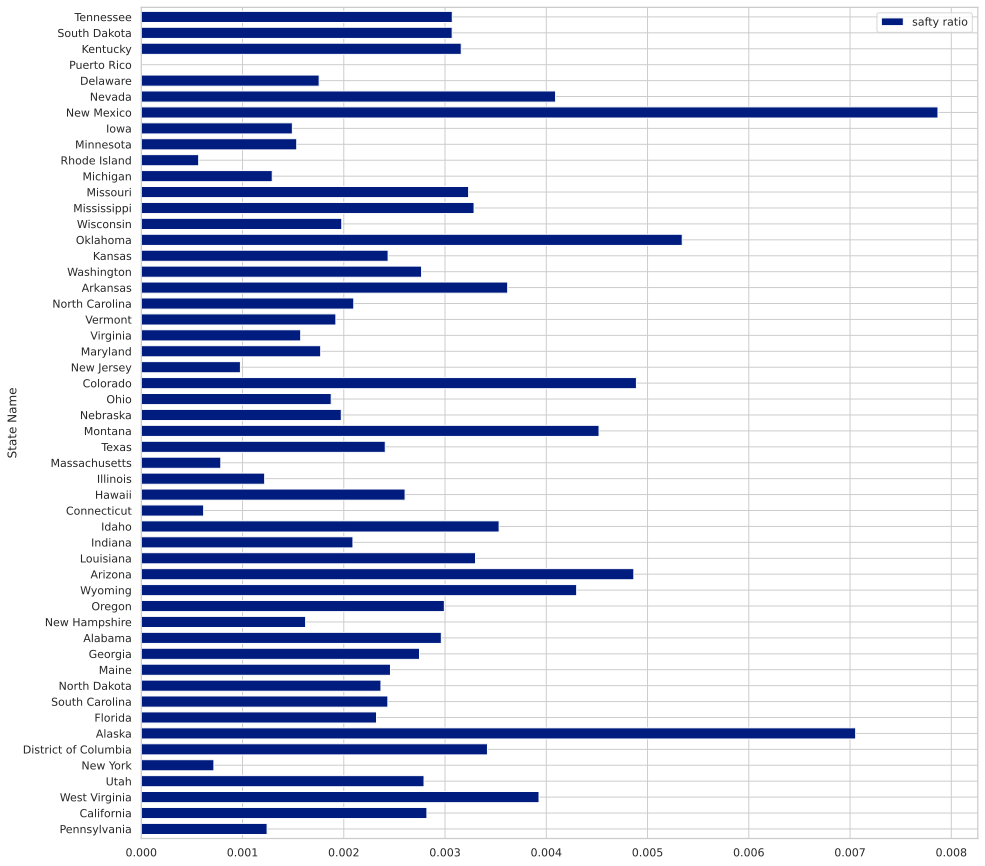

In [ ]:
ax = tempo.plot.barh(y='safty ratio',figsize=(15,15),width = 0.7)

In [ ]:
race = DataFrame1['race']

In [ ]:
race.dropna()

0           A
1           W
2           H
3           W
4           H
        ...  
7677    Other
7678    Other
7679    Other
7680    Other
7681        B
Name: race, Length: 7682, dtype: object

In [ ]:
race.value_counts()

W        3183
B        1678
Other    1438
H        1127
A         112
N          97
O          47
Name: race, dtype: int64

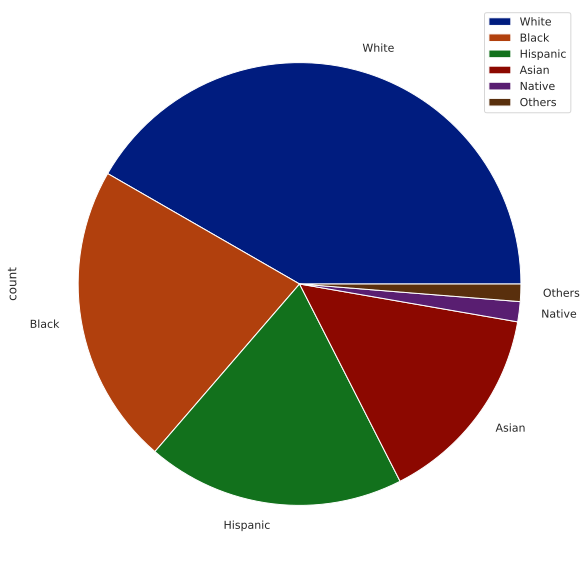

In [ ]:
racepie = pd.DataFrame({'count': [race.value_counts()[0],race.value_counts()[1],race.value_counts()[2],race.value_counts()[3],race.value_counts()[4],race.value_counts()[5]]},index=['White', 'Black', 'Hispanic','Asian','Native','Others'])
plot = racepie.plot.pie(y='count', figsize=(10, 10))

In [ ]:
DataFrame1['counts']=1

In [ ]:
fleeing = DataFrame1[(DataFrame1['flee'] == 'Not fleeing') & (DataFrame1['armed'] == 'unarmed')]

In [ ]:
unarmNOTflee = fleeing.groupby('race').sum()
unarmNOTflee['counts']

race
A          4
B         64
H         40
N          2
O          4
Other      9
W        104
Name: counts, dtype: int64

In [ ]:
unarmNOTflee.index

Index(['A', 'B', 'H', 'N', 'O', 'Other', 'W'], dtype='object', name='race')

In [ ]:
census_race_pop = census_DataFrame.sum().to_frame()
census_race_pop.drop(labels=['state','Native percent','Asian percent',
'White percent',
'Black percent',
'Hispanic percent',
'Others percent',	
'safty ratio'],axis=0)

,0
Total Population,329824950
Native,2694311
Asian,18427519
White,196283090
Black,41595290
Hispanic,62573645
Others,8251095


In [ ]:
census_race_pop.at['Black',0]

41595290

In [ ]:
(unarmNOTflee.at['B','counts']/census_race_pop.at['Black',0])*100000

0.15386357445758883

In [ ]:
(unarmNOTflee.at['W','counts']/census_race_pop.at['White',0])*100000

0.052984696745909186

In [ ]:
fleeing = DataFrame1[(DataFrame1['flee'] != 'Not fleeing') & (DataFrame1['armed'] == 'unarmed')]

In [ ]:
unarmflee = fleeing.groupby('race').sum()
unarmflee['counts']

In [ ]:
(unarmflee.at['B','counts']/census_race_pop.at['Black',0])*100000

In [ ]:
(unarmflee.at['W','counts']/census_race_pop.at['White',0])*100000

In [ ]:
fleeing = DataFrame1[(DataFrame1['flee'] != 'Not fleeing') & (DataFrame1['armed'] != 'unarmed')]

In [ ]:
armflee = fleeing.groupby('race').sum()
armflee['counts']

In [ ]:
(armflee.at['B','counts']/census_race_pop.at['Black',0])*100000

In [ ]:
(armflee.at['W','counts']/census_race_pop.at['White',0])*100000

In [ ]:
fleeing = DataFrame1[(DataFrame1['flee'] == 'Not fleeing') & (DataFrame1['armed'] != 'unarmed')]

In [ ]:
armNOTflee = fleeing.groupby('race').sum()
armNOTflee['counts']

In [ ]:
(armNOTflee.at['B','counts']/census_race_pop.at['Black',0])*100000

In [ ]:
(armNOTflee.at['W','counts']/census_race_pop.at['White',0])*100000

In [ ]:
raceWise = DataFrame1[(DataFrame1['threat_level']=='attack')]

In [ ]:
racewiseGrouped = raceWise.groupby('race').sum()
racewiseGrouped['counts']

In [ ]:
police_deaths = pd.read_csv("police_deaths_538.csv")

In [ ]:
police_deaths.info()

In [ ]:
police_deaths.describe()

In [ ]:
police_deaths.head()

In [ ]:
# Create pivot table and plot horizontal bar chart
a = police_deaths.pivot_table(index='cause_short', values='cause', aggfunc='count')\
        .sort_values(by='cause', ascending=True)\
        .plot(kind='barh', figsize=(12, 14), color='orange', width=0.85, xlim=[0, 12500], legend=False)

# Remove spines and set tick labels
a.spines['right'].set_visible(False)
a.spines['top'].set_visible(False)
a.spines['left'].set_visible(False)
a.spines['bottom'].set_visible(False)
a.xaxis.set_major_locator(ticker.MultipleLocator(750))
a.set_xlabel('No. of deaths', labelpad=25, size=16)
a.set_ylabel('Cause of deaths', labelpad=25, size=16)
a.set_title('Causes of Officer Death', size=18)
a.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

# Add vertical lines and bar labels
values = a.get_xticks()
for tick in values:
    a.axvline(x=tick, linestyle='dotted', alpha=0.6, color='red', zorder=2)
for i in a.containers:
    for j in i:
        a.text(j.get_width() + 0.3, j.get_y() + j.get_height() / 2, 
               '{:,.0f}'.format(j.get_width()), fontsize=10, color='green')


In [ ]:
corr = census_DataFrame.corr()
sns.heatmap(corr, cmap="YlGnBu")
plt.title("Correlation between Census Features")
plt.show()

In [ ]:
fatal_en= pd.read_csv("fatal_encounters_dot_org.csv")

In [ ]:
fatal_en.describe()

In [ ]:
fatal_en = fatal_en.iloc[:,[0,2,1,3,4,5,8,10,11,15,16,18,19,22,27]]

In [ ]:
fatal_en.head()

In [ ]:
fatal_en_pv = pd.pivot_table(fatal_en,index=['Location of death (state)'],values = ['Unique ID'],columns = ['Cause of death'], aggfunc="count").fillna(value=0)
fatal_en_pv.columns = fatal_en_pv.columns.droplevel()
fatal_en_pv.loc[:,'Total'] = fatal_en_pv.sum(axis=1)
fatal_en_pv.sort_values("Total", axis = 0, ascending = True, inplace=True)
colors2 = plt.cm.nipy_spectral(np.linspace(0, 1, 15))
a2 = fatal_en_pv.drop(['Total'], axis = 1).plot.barh(figsize=(12,16),stacked=True, width=0.80,color=colors2 )
a2.set_xlabel("Total People Killed", labelpad=20, weight='bold',size=14)
a2.set_ylabel("States", labelpad=20, weight='bold', size=14)
a2.set_title("Causes of People Death per different State  ", size=20)

In [ ]:
fatal_en.rename(columns={"Location of death (city)": "Location"}, inplace=True)
text_list = fatal_en['Location'].astype(str).tolist()

word_could_dict = Counter(text_list)

wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='green',
    max_words=20,
    colormap='winter'
).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(30, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [ ]:
# Read the shootings dataset
shootings = pd.read_csv("shootings_wash_post.csv")

In [ ]:
# Replace abbreviations with full race and gender names
race_dict = {'W': 'White', 'B': 'Black', 'A': 'Asian', 'N': 'Native', 'H': 'Hispanic', 'O': 'Other'}
gender_dict = {'M': 'Male', 'F': 'Female'}
shootings["race"] = shootings["race"].map(race_dict)
shootings["gender"] = shootings["gender"].map(gender_dict)

In [ ]:
# Replace missing values with appropriate values
shootings['armed'].fillna('No', inplace=True)
shootings['age'].fillna(0, inplace=True)
shootings['race'].fillna('Other', inplace=True)
shootings['flee'].fillna('Not specified', inplace=True)

In [ ]:
# Rename a column for clarity
shootings.rename(columns={"signs_of_mental_illness": "Signs Mental illness"}, inplace=True)

In [ ]:
# Check for any remaining missing values
shootings.isna().sum()

In [ ]:
# Print the first few rows of the dataframe
shootings.head()

In [ ]:
text_list = shootings["city"].astype(str).tolist()
word_could_dict = Counter(text_list)

wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='green',
    max_words=10
).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(30, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [ ]:
text_list = [str(armed) for armed in shootings["armed"]]
word_count_dict = Counter(text_list)

wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='green',
    max_words=10
).generate_from_frequencies(word_count_dict)

plt.figure(figsize=(30, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [ ]:
shootings['date'] = pd.to_datetime(shootings['date'])
shootings[['year', 'month', 'day']] = shootings['date'].dt.date.astype(str).str.split('-', expand=True).astype(int)
print(shootings)

In [ ]:
DataFrame_mod = shootings[shootings.year != 2022]
sns.set(style='darkgrid')
sns.countplot(data=DataFrame_mod, x='year', palette='pastel')
plt.title('Shootings Year from 2015 to 2020', fontsize=16)
plt.show()

In [ ]:
Group_by_Year = DataFrame_mod.groupby("year")
fig = px.line(Group_by_Year.count().date, title='Number of Shootings from 2015 to 2020 year', markers=True, color_discrete_sequence=['#1f77b4'])
fig.update_traces(line_color='green')
fig.show()

In [ ]:
Group_by_Month = DataFrame_mod.groupby('month')
fig = px.line(Group_by_Month.count().date, title='Number of Shootings with respect to Month', markers=True)
fig.update_traces(line_color='green')
fig.show()


In [ ]:
Group_by_day = DataFrame_mod.groupby('day')
fig = px.line(Group_by_day.count().date, title='Number of Shootings by day',markers=True)
fig.update_traces(line_color='green')
fig.show()

In [ ]:
df_year_month = DataFrame_mod.groupby(by=['year','month']).count().date
df_year_month = df_year_month.reset_index().pivot('year','month','date').transpose()
fig = px.line(np.cumsum(df_year_month), title='Number of Shootings with Cumulative representation', markers=True, color_discrete_sequence=['green'])
fig.show()

In [ ]:
labels = ['shot', 'shot and tasered']
sizes = shootings.manner_of_death.value_counts().values
colors = ['#ff9999','#66b3ff']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.title('Manner of Death of the person')
plt.show()

print(shootings.manner_of_death.value_counts())


In [ ]:
plt.figure(figsize=(7,7))
plt.title('Threat Level')
sns.set_palette('husl')
sns.countplot(x='threat_level', data=DataFrame_mod)
plt.show()

print(DataFrame_mod.threat_level.value_counts())

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=DataFrame_mod, x='armed', order=DataFrame_mod['armed'].value_counts().index, palette='Set2')
plt.title("Number of Cases by Weapon Type")
plt.xticks(rotation=90)
plt.show()

armed_counts = DataFrame_mod.armed.value_counts()
print(armed_counts.head(26))


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.histplot(data=DataFrame_mod, x='age', kde=True, ax=ax[0])
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Count')
ax[0].set_title('Histogram of Age')

sns.boxplot(x=DataFrame_mod['age'], ax=ax[1])
ax[1].set_xlabel('Age')
ax[1].set_title('Boxplot of Age')

plt.suptitle('Distribution of Age')
plt.show()


In [ ]:
Data_year_state = DataFrame_mod.groupby(['year', 'state']).size().reset_index(name='count')

fig = px.choropleth(Data_year_state,
                    locations='state', 
                    locationmode="USA-states",
                    color='count',
                    color_continuous_scale="Viridis_r", 
                    scope="usa",
                    animation_frame='year',
                    title="Incidents Observed in Each State Over the Year")

fig.show()


In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=DataFrame_mod,x='flee',hue='threat_level', palette='Set2')
plt.title("Count of Flee and Attack")
plt.show()
DataFrame_mod.flee.value_counts()


In [ ]:
data = pd.read_csv("shootings.csv")

In [ ]:
data.describe()

In [ ]:
data.head()

In [ ]:
fig = px.bar(data['manner_of_death'].value_counts(), x=data['manner_of_death'].value_counts().index, y=data['manner_of_death'].value_counts().values, color=data['manner_of_death'].value_counts().index, labels={'x': 'manner of death', 'y': 'count'})
fig.update_layout(title='Frequency of reason of death', height=500, width=500)
fig.show()

In [ ]:
fig = px.bar(data['armed'].value_counts(), x=data['armed'].value_counts().index, y=data['armed'].value_counts().values, color=data['armed'].value_counts().index, labels={'x': 'weapons used', 'y': 'count'})
fig.update_layout(title='Frequency of different weapons used', height=700, width=1000)
fig.show()


In [ ]:


fig = px.bar(data['gender'].value_counts(), x=data['gender'].value_counts().index, y=data['gender'].value_counts().values, color=data['gender'].value_counts().index, labels={'x': 'gender', 'y': 'count'})
fig.update_layout(title='Gender Difference', height=500, width=500)
fig.show()


In [ ]:
df = data.groupby('date')['manner_of_death'].count().reset_index()
df['date'] = pd.to_datetime(df['date'])
df['year-month'] = df['date'].dt.strftime('%Y-%m')
df_ym = df.groupby('year-month')[['manner_of_death']].sum().reset_index()
df_ym['year-month'] = pd.to_datetime(df_ym['year-month'])
df_ym = df_ym.sort_values('year-month')

fig = go.Figure(go.Scatter(x=df_ym['year-month'], y=df_ym['manner_of_death'], 
                           mode='lines+markers', 
                           marker=dict(color='rgba(255, 0, 0, 0.8)'), 
                           line=dict(color='rgba(255, 0, 0, 0.8)')))
fig.update_layout(title_text='No of deaths (2015-2020)', yaxis_title="no. of deaths")
fig.show()


In [ ]:
df

In [ ]:
df=data['race'].value_counts().reset_index().rename(columns={'index':'race','race':'count'})
fig = go.Figure(go.Bar(x=df['race'],y=df['count'],marker={'color': df['count'],'colorscale': 'Blues'},))
fig.update_layout(title_text='Different Races Frequency',xaxis_title="Race of the person",yaxis_title="Total Count",height=500,width=500)
fig.show()

In [ ]:
fig = go.Figure(go.Bar(
    x=df_ym['year-month'],
    y=df_ym['manner_of_death'],
    marker={'color': df_ym['manner_of_death'], 'colorscale': 'Blues'},
    text=df_ym['manner_of_death']
))
fig.update_layout(title_text='Number of Deaths from 2015-2020', yaxis_title="number of deaths")
fig.show()

In [ ]:
fig = go.Figure(go.Box(y=data['age'], marker_color='#7b6de3'))
fig.update_layout(title="Age Distribution")
fig.show()

In [ ]:
sns.distplot(data['age'], kde=True, hist_kws={'color': 'darkcyan'}, kde_kws={'color': 'black'})


In [ ]:
sns.boxplot(x="gender", y="age", palette=["#3498db", "#e74c3c"], data=data)
sns.despine(offset=10, trim=True)

In [ ]:
Dataframe_male=data[data['gender']=='M']['age'].values
Dataframe_female=data[data['gender']=='F']['age'].values
sns.set_palette("Paired")
sns.distplot(Dataframe_male, hist=False, rug=True)
sns.distplot(Dataframe_female, hist=False, rug=True)

In [ ]:
sns.boxplot(x="race", y="age", data=data, palette=["#800000", "#FFA07A", "#008080", "#00CED1", "#FFD700"])
sns.despine(offset=10, trim=True)

In [ ]:
PK = pd.read_csv('fatal-police-shootings-data.csv', encoding='latin1')

In [ ]:
def ActualVsPopulation(df, population, group):
    """
    Get a DataFrame with actual per-group percentage vs population group percentage.
    """
    data = {group: [], 'type': [], 'percent': []}
    total_population = float(sum(population.values()))
    try:
        total_kills = float(df.id.count())
    except ZeroDivisionError:
        total_kills = 0
        
    for g in df[group].dropna().unique():
        # Actual percentage
        kills = df[df[group] == g].id.count()
        actual_percent = round(100 * kills / total_kills, 2) if total_kills > 0 else 0
        data[group].append(g)
        data['type'].append('Killings')
        data['percent'].append(actual_percent)
        
        # Population percentage
        pop_percent = round(100 * population[g] / total_population, 2)
        data[group].append(g)
        data['type'].append('Population')
        data['percent'].append(pop_percent)
        
    return pd.DataFrame(data=data)


In [ ]:
# Plot percent police killings by race vs population percentages
pop_r = {'W': 60.7, # white - % population by race https://www.census.gov/quickfacts/fact/table/US
         'B': 13.4, # black or african american
         'H': 18.1, # hispanic or latino
         'A': 5.8,  # asian
         'N': 1.5,  # american indian, alaska native, naitive hawaiian, and other pacific islander
         'O': 0.5}  # other
df = ActualVsPopulation(PK, pop_r, 'race')
sns.barplot(x="race", y="percent", hue="type", data=df,
            order = PK.race.value_counts().index, palette=["g", "C0"])
plt.title('Shooting vs Population Distribution (by Race)')
plt.show()

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Population for each state
# https://www.census.gov/data/datasets/2017/demo/popest/state-total.html
pop_s ={'AL': 4874747,
        'AK': 739795,
        'AZ': 7016270,
        'AR': 3004279,
        'CA': 39536653,
        'CO': 5607154,
        'CT': 3588184,
        'DE': 961939,
        'DC': 693972,
        'FL': 20984400,
        'GA': 10429379,
        'HI': 1427538,
        'ID': 1716943,
        'IL': 12802023,
        'IN': 6666818,
        'IA': 3145711,
        'KS': 2913123,
        'KY': 4454189,
        'LA': 4684333,
        'ME': 1335907,
        'MD': 6052177,
        'MA': 6859819,
        'MI': 9962311,
        'MN': 5576606,
        'MS': 2984100,
        'MO': 6113532,
        'MT': 1050493,
        'NE': 1920076,
        'NV': 2998039,
        'NH': 1342795,
        'NJ': 9005644,
        'NM': 2088070,
        'NY': 19849399,
        'NC': 10273419,
        'ND': 755393,
        'OH': 11658609,
        'OK': 3930864,
        'OR': 4142776,
        'PA': 12805537,
        'RI': 1059639,
        'SC': 5024369,
        'SD': 869666,
        'TN': 6715984,
        'TX': 28304596,
        'UT': 3101833,
        'VT': 623657,
        'VA': 8470020,
        'WA': 7405743,
        'WV': 1815857,
        'WI': 5795483,
        'WY': 579315}

# Plot percent police killings by state vs population percentages
df = ActualVsPopulation(PK, pop_s, 'state')

plt.figure(figsize=(10, 16))
sns.barplot(y="state", x="percent", hue="type", data=df,
            order = PK.state.value_counts().index, palette=["red", "blue"])
plt.title('Actual Police Killings vs Population Distribution (by State)')
plt.xlabel('Percent')
plt.ylabel('State')
plt.show()


In [ ]:
lam = 10 #lambda, the "expected" number
k1 = 5   #k, the actual number, when more than expected
k2 = 15  #k, the actual number, when less than expected

xx = np.arange(0,30)
ppd = poisson.pmf(xx, lam) #poisson probability distribution
cppd = poisson.cdf(xx, lam) #cumulative poisson distribution

# Set color scheme
colors = ['tab:blue', 'tab:green', 'tab:red']

p_k1 = poisson.pmf(k1, lam) #probability of observing k1
p_k2 = poisson.pmf(k2, lam) #and k2
c_k1 = poisson.cdf(k1, lam) #cumulative probability of observing k1
c_k2 = poisson.cdf(k2, lam) #and k2

# Plot Poisson Probability Distribution
fig, ax = plt.subplots()
ax.plot(xx, ppd, color=colors[0], marker='o')
ax.axvline(k1, color=colors[1], linestyle='--')
ax.axhline(p_k1, color=colors[1], linestyle='--')
ax.axvline(k2, color=colors[2], linestyle='--')
ax.axhline(p_k2, color=colors[2], linestyle='--')
ax.set_title(r'Poisson Distribution, $\lambda=10$')
ax.set_xlabel('k')
ax.set_ylabel('Probability')
ax.set_xlim([0, 30])
ax.set_ylim([0, 0.14])
plt.show()

# Plot Poisson Cumulative Distribution
fig, ax = plt.subplots()
ax.plot(xx, cppd, color=colors[0], marker='o')
ax.axvline(k1, color=colors[1], linestyle='--')
ax.axhline(c_k1, color=colors[1], linestyle='--')
ax.axvline(k2, color=colors[2], linestyle='--')
ax.axhline(c_k2, color=colors[2], linestyle='--')
ax.set_title(r'Poisson Cumulative Distribution, $\lambda=10$')
ax.set_xlabel('k')
ax.set_ylabel('Cumulative Probability')
ax.set_xlim([0, 30])
ax.set_ylim([0, 1])
plt.show()


In [ ]:
# Compute the cumulative Poisson distribution value for each state
natl_rate = PK.shape[0]/sum(pop_s.values()) #national average rate of police shootings per person
cum_poisson_vals = [] #to store cumulative poisson values
for state in pop_s.keys():
    lam = natl_rate*pop_s[state] #num shootings for this state if rate matched national avg (lambda)
    k = PK[PK.state==state].shape[0] #actual number of shootings in this state
    cum_poisson_vals.append(poisson.cdf(k, lam))

# Plot cumulative Poisson distribution values
plt.figure(figsize=(6, 13))
EK = pd.DataFrame(data={'state': list(pop_s.keys()), 
                        'cum_poisson': cum_poisson_vals})
EK.sort_values('cum_poisson', inplace=True)
y = np.arange(len(EK.state))
plt.barh(y, EK.cum_poisson-0.5, left=0.5, color='green')
ax = plt.gca()
ax.set_yticks(y)
ax.set_yticklabels(EK.state)
ax.invert_yaxis()
plt.plot([0.5, 0.5], [y[0]-1, y[-1]+1], 'k', linewidth=2)
plt.title('Police Shootings: Cumulative Probability\ngiven national average, by State')
plt.ylabel('State')
plt.xlabel('Cumulative Poisson Probability')
plt.text(0.505, y[0]-1.5, 
         r'Less shootings $\leftarrow$ $\rightarrow$ More shootings',
         horizontalalignment='center', color='gray')
plt.show()


In [ ]:
# Convert date from object to datetime
PK.date = pd.to_datetime(PK.date)

In [ ]:
# Plot shootings by month
plt.figure(figsize=(5,8))
sns.countplot(y=PK.date.dt.strftime('%Y %m %B'), 
              order=sorted(PK.date.dt.strftime('%Y %m %B').unique()), palette='Set2')
plt.title('Shooting By Month')
plt.show()


In [ ]:
# Plot shootings by day of week
dow_map={0:'M', 1:'T', 2:'W', 3:'Th', 4:'F', 5:'Sa', 6:'Su'}
sns.countplot(x=PK.date.dt.dayofweek.map(dow_map), order=dow_map.values(), palette='pastel')
plt.title('Shooting By Day of Week')
plt.show()


In [ ]:
# Plot how many individuals showed signs of mental illness
ax = sns.countplot(x='signs_of_mental_illness', data=PK, palette='Blues')
for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2g}%'.format(100.*y/len(PK)), (x.mean(), y), ha='center', va='bottom')
plt.title('mental illness of the individuals during shoting')
plt.show()


In [ ]:
# Set color palette
colors = sns.color_palette("muted")

# Plot how many individuals were fleeing when shot
ax = sns.countplot(x='flee', data=PK, palette=colors)
for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2g}%'.format(100.*y/len(PK)), (x.mean(), y), ha='center', va='bottom')
plt.title('Method used for fleeing during shoting')
plt.show()


In [ ]:
# New color palette
colors = ['#FF5733', '#2C3E50']

# Plot how many shootings have body camera footage
ax = sns.countplot(x='body_camera', data=PK, palette=colors)
for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2g}%'.format(100.*y/len(PK)), (x.mean(), y), ha='center', va='bottom')
plt.title('Whether officer wears body camera, time of the shooting')
plt.show()


In [ ]:
pcPK = PK.groupby('state').agg({'body_camera': 'mean'})
plt.figure(figsize=(8, 13))
sns.barplot(x=100.*pcPK.values.flatten(),
y=pcPK.index,
order=pcPK.body_camera.sort_values(ascending=False).index,
palette='rocket')
plt.title('Percentage Police Killings with bodycamera in different by State')
plt.xlabel('Percentage Shootings with bodycamera')
plt.xlim([0, 100])
plt.show()

In [ ]:
DataFrame1['date'].describe()

In [ ]:
DataFrame1['date'] = pd.to_datetime(DataFrame1['date'])

In [ ]:
DataFrame1['year'] = pd.DatetimeIndex(DataFrame1['date']).year

In [ ]:
DataFrame1['year'].nunique()

In [ ]:
Year_Count = pd.DataFrame();

In [ ]:
DataFrame1['year'].value_counts()

In [ ]:
Year_Count['year'] =  DataFrame1['year'].unique()
Year_Count =  Year_Count.drop(7)

In [ ]:
Year_Count

In [ ]:
x=[]
def yearCount(i):
  print(DataFrame1['year'].value_counts()[i])
  x.append(DataFrame1['year'].value_counts()[i])
  print(x)

for i in Year_Count['year']:
  print(i)
  yearCount(i)

Year_Count = Year_Count.assign(count = x)

In [ ]:
Year_Count['count'].describe()

In [ ]:
#find line of best fit
a, b = np.polyfit(Year_Count['year'],Year_Count['count'] , 1)

#add points to plot
plt.scatter(Year_Count['year'],Year_Count['count'])

#add line of best fit to plot
plt.plot(Year_Count['year'], a*Year_Count['year']+b)
print(b+2023*a)  

In [ ]:
from statistics import mean
def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b
m, b = best_fit_slope_and_intercept(Year_Count['year'],Year_Count['count'])

print(m,b)
regression_line = [(m*x)+b for x in Year_Count['year']]


regression_line = []
for x in Year_Count['year']:
    regression_line.append((m*x)+b)

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


plt.scatter(Year_Count['year'],Year_Count['count'],color='#003F72')
plt.plot(Year_Count['year'], regression_line)
plt.show()

In [ ]:
predict_x = 2023
predict_y = (m*predict_x)+b


In [ ]:
row = {'year': 2023 , 'count':predict_y}
print(row)
Year_Count = Year_Count.append(row, ignore_index = True)
regression_line = []
for x in Year_Count['year']:
    regression_line.append((m*x)+b)
plt.scatter(Year_Count['year'],Year_Count['count'],color='#003F72',label='data')
plt.plot(Year_Count['year'], regression_line, label='regression line')
plt.legend(loc=4)
plt.show()

In [ ]:
predict_x = 2023
predict_y = (m*predict_x)+b
row = {'year': 2022 , 'count':predict_y}
print(row)
Year_Count = Year_Count.append(row, ignore_index = True)
regression_line = []
for x in Year_Count['year']:
    regression_line.append((m*x)+b)
plt.scatter(Year_Count['year'],Year_Count['count'],color='#003F72',label='data')
plt.plot(Year_Count['year'], regression_line, label='regression line')
plt.legend(loc=4)
plt.show()


In [ ]:
demo = pd.DataFrame();
#demo['month_year'] = pd.to_datetime(DataFrame1['date']).dt.to_period('M')
demo['month_year'] = DataFrame1['date'].apply(lambda x: x.strftime('%B-%Y')) 
demo['month_year'] = pd.to_datetime(demo['month_year'])
demo.info()

In [ ]:
demo = demo.value_counts().to_frame('counts')
demo

In [ ]:
demo = demo.sort_values(["month_year"])
demo = demo[:-1]

print(demo.tail())
demo.plot()
demo["counts"] = pd.to_numeric(demo["counts"])
demo.head()

Reference: 
https://www.kaggle.com/datasets/zusmani/us-mass-shootings-last-50-years
https://www.kaggle.com/datasets/fivethirtyeight/police-officer-deaths-in-the-us
https://www.kaggle.com/datasets/fivethirtyeight/fivethirtyeight-police-deaths-dataset
https://www.kaggle.com/code/kwullum/fatal-police-shootings-in-the-us-racial-bias
https://www.kaggle.com/code/brendanhasz/police-shootings-eda/input
"https://api.census.gov/data/2020/acs/acs5?"
https://www.washingtonpost.com/graphics/investigations/police-shootings-database/
https://towardsdatascience.com/an-examination-of-fatal-force-by-police-in-the-us-db897d97085c